References:
1. Panduan Lab 5

In [103]:
import matplotlib.pyplot as plt
import numpy as np
import copy
import cv2
import os

from typing import Union
from scipy import fftpack as fp
from skimage import color
from skimage import filters
from skimage import io
from skimage import morphology
from skimage import util
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries

## **1. [30] Image Histogram**

### Diberikan dua buah kelas citra yaitu kelas hutan dan juga lautan yang terdiri dari masing-masing 4 citra untuk kedua kelas. Lakukan pengklasifikasian kedua buah citra ke dalam kelas yang sesuai dengan menggunakan fitur image histogramnya.

### a. [20] Buatlah method predict yang menerima parameter nama_file dan mengembalikan output “hutan” untuk citra yang tergolong sebagai hutan dan lautan untuk citra yang tergolong sebagai lautan. Method predict yang dibuat wajib menggunakan fitur berupa image histogram. Pengecekan dan ekstraksi fitur yang dilakukan pada setiap citra harus di automasi, tidak boleh di-hardcode untuk tiap citra.

In [104]:
def predict(nama_file: str) -> Union[str, None]:
    """Method untuk memprediksi gambar adalah hutan/lautan"""
    try:
        img = io.imread(nama_file, plugin='matplotlib')
        frequency_count = np.bincount(img.flatten())
        cum_sum = np.cumsum(frequency_count)
    except (IOError, SyntaxError) as e:
        return None

    # lebih banyak intensitas rendah, prediksi sebagai hutan
    if cum_sum[127] > (cum_sum[-1] - cum_sum[127]):
        return 'hutan'
    else:
        return 'lautan'

folder = "Tugas Lab 6 Images/histogram"
for filename in os.listdir(folder):
    filename = f'{folder}/{filename}'
    prediction = predict(filename)
    if prediction:
        print(f'image {filename} predicted as {prediction}')
    else:
        print(f'image {filename} might be corrupted or not an image file')

image Tugas Lab 6 Images/histogram/sea2.jpg predicted as lautan
image Tugas Lab 6 Images/histogram/forest3.jpg predicted as hutan
image Tugas Lab 6 Images/histogram/forest2.jpg predicted as hutan
image Tugas Lab 6 Images/histogram/sea3.jpg predicted as lautan
image Tugas Lab 6 Images/histogram/sea1.jpg predicted as lautan
image Tugas Lab 6 Images/histogram/forest1.jpg predicted as hutan
image Tugas Lab 6 Images/histogram/sea4.jpg predicted as lautan
image Tugas Lab 6 Images/histogram/.DS_Store might be corrupted or not an image file
image Tugas Lab 6 Images/histogram/forest4.jpg predicted as hutan


### b. [10] Jelaskan fitur yang telah Anda buat pada bagian a dan alasan Anda memilih fitur tersebut.

## **2. [30] Hough Transformation**

### Diberikan dua buah kelas citra yaitu kelas segitiga siku siku dan juga segitiga sama sisi yang terdiri dari masing-masing 4 citra untuk kedua kelas. (Asumsikan posisi segitiga yang mungkin hanya sesuai citra yang diberikan pada dataset, tidak ada miring 10° atau semacamnya)

### a. [20] Gunakan hasil hough transformation yang telah didapatkan sebagai fitur untuk mengklasifikasikan apakah citra tersebut merupakan segitiga siku siku atau segitiga sama sisi. Manfaatkan variabel theta yang ada pada template lab untuk menentukannya. Anda dapat menggunakan cv2.HoughLines seperti yang dijabarkan pada tutorial. (Hint: Cek dalam skala apa theta dikembalikan oleh fungsi HoughLines)

In [105]:
def classify_triangle(filename: str) -> str:
    img = io.imread(filename)
    # convert image to gray
    gray = (color.rgb2gray(img) * 255).astype(np.uint8)
    # find all of the edges using canny
    edges = cv2.Canny(gray, 50, 150, apertureSize=3)
    # find all of the lines using hough transformation
    lines = cv2.HoughLines(edges, 1, np.pi/180, 200)

    thetas_in_deg = []

    for line in lines:
        for _, theta in line:
            thetas_in_deg.append(np.degrees(theta))

    thetas_in_deg = list(set(map(round, thetas_in_deg)))
    thetas_in_deg.pop(0)

    if 90 in thetas_in_deg:
        return 'siku-siku'
    else:
        return 'sama sisi'

folder = "Tugas Lab 6 Images/segitiga"
for filename in os.listdir(folder):
    full_dir = f'{folder}/{filename}'
    classification = classify_triangle(full_dir)
    print(f'triangle {filename[0:-4]} is classified as {classification}')

triangle siku siku 4 is classified as siku-siku
triangle siku siku 2 is classified as siku-siku
triangle siku siku 3 is classified as siku-siku
triangle siku siku 1 is classified as siku-siku
triangle sama sisi 4 is classified as sama sisi
triangle sama sisi 3 is classified as sama sisi
triangle sama sisi 2 is classified as sama sisi
triangle sama sisi 1 is classified as sama sisi


/var/folders/4y/f7n6cknn4dd3pvy303271wjh0000gn/T/ipykernel_78999/4284499653.py:4: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  gray = (color.rgb2gray(img) * 255).astype(np.uint8)


### b. [10] Jelaskan lebih detail tentang parameter yang anda gunakan sebagai argumen dan fitur yang Anda ekstraksi pada bagian a dan.

## **3. [40] Template Matching**

### Diberikan citra ‘pertandingan 1.jpg’, ‘pertandingan 2.jpg’ dan ‘bola.jpg’

### a. [15] Lakukan dan tampilkan hasil template matching dengan berbagai threshold pada kedua gambar! Anda bisa menggunakan library OpenCV/Skimage/lainnya.

In [106]:
# Import citra yang dibutuhkan
pertandingan_1_img = cv2.cvtColor(cv2.imread('Tugas Lab 6 Images/template matching/pertandingan 1.jpeg'), cv2.COLOR_BGR2RGB)
pertandingan_2_img = cv2.cvtColor(cv2.imread('Tugas Lab 6 Images/template matching/pertandingan 2.jpeg'), cv2.COLOR_BGR2RGB)
template_bola_img = cv2.cvtColor(cv2.imread('Tugas Lab 6 Images/template matching/bola.jpg'), cv2.COLOR_BGR2RGB)

# Ubah gray
pertandingan_1_img_gray = cv2.cvtColor(cv2.imread('Tugas Lab 6 Images/template matching/pertandingan 1.jpeg'), cv2.COLOR_RGB2GRAY)
pertandingan_2_img_gray = cv2.cvtColor(cv2.imread('Tugas Lab 6 Images/template matching/pertandingan 2.jpeg'), cv2.COLOR_RGB2GRAY)
template_bola_img_gray = cv2.cvtColor(cv2.imread('Tugas Lab 6 Images/template matching/bola.jpg'), cv2.COLOR_RGB2GRAY)

# Menyimpan width dan height template
w, h = template_bola_img_gray.shape[::-1]

# Apply template matching
# parameter ketiga merupakan method, bisa melihat dokumentasi openCV untuk penjelasan lebih lanjut dan pilihan method lainnya
res_1 = cv2.matchTemplate(pertandingan_1_img_gray, template_bola_img_gray, cv2.TM_CCOEFF_NORMED)
res_2 = cv2.matchTemplate(pertandingan_2_img_gray, template_bola_img_gray, cv2.TM_CCOEFF_NORMED)

# Copy citra pertandingan untuk ditandai bounding box
template_matched_1 = pertandingan_1_img.copy()
template_matched_2 = pertandingan_2_img.copy()

# Tentukan threshold
threshold = 0.9
loc_1 = np.where( res_1 >= threshold)
loc_2 = np.where( res_2 >= threshold)

# Buat bounding box dengan rectangle. Rectangle memiliki 4 parameter yaitu (image, start_point, end_point, color, thickness)
for point in zip(*loc_1[::-1]):
    cv2.rectangle(template_matched_1, point, (point[0] + w, point[1] + h), (0,0,255), 2)

for point in zip(*loc_2[::-1]):
    cv2.rectangle(template_matched_2, point, (point[0] + w, point[1] + h), (0,0,255), 2)

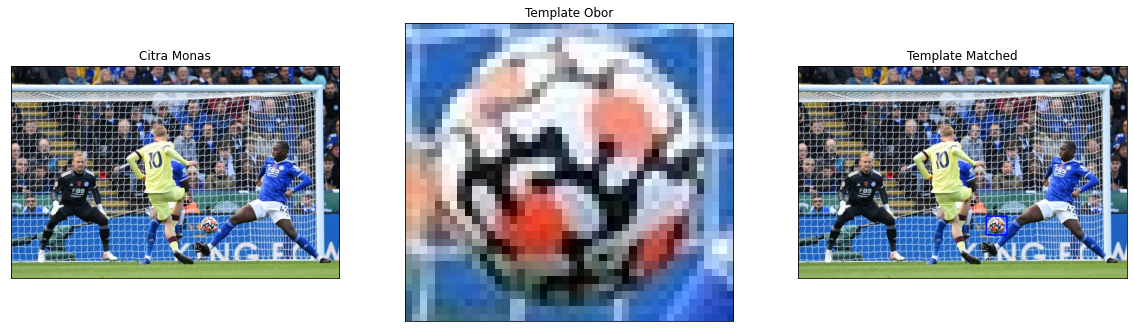

In [107]:
# Menampilkan citra
plt.figure(figsize=(20,10))
plt.subplot(131),plt.imshow(pertandingan_1_img)
plt.title('Citra Monas'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(template_bola_img)
plt.title('Template Obor'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(template_matched_1)
plt.title('Template Matched'), plt.xticks([]),
plt.yticks([])
plt.show()

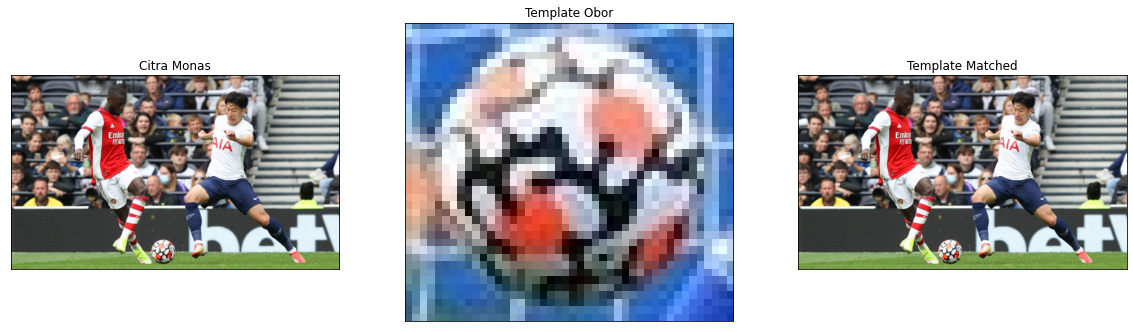

In [108]:
# Menampilkan citra
plt.figure(figsize=(20,10))
plt.subplot(131),plt.imshow(pertandingan_2_img)
plt.title('Citra Monas'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(template_bola_img)
plt.title('Template Obor'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(template_matched_2)
plt.title('Template Matched'), plt.xticks([]),
plt.yticks([])
plt.show()

### b. [15] Berdasarkan eksplorasi di poin a, perbedaan apa yang Anda temukan? Mengapa perbedaan ini terjadi?

### c. [10] Menurut Anda, apakah kelebihan dan kekurangan metode fitur ekstraksi ini? Apakah untuk kasus template matching untuk bola pada gambar pertandingan sepak bola cocok?